# 👋

# **OASIS INFOBYTE**

# **Data Science Internship**

# **Author: Ahmad Talha Ansari**

# **Unemployment Analysis with Python ❕**

In this problem we have two datasets so we will be working with both side by side. To access the dataset visit this [link](https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india.)

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# this line of code ignores all warnings.
warnings.filterwarnings("ignore")

## **Load Dataset**

In [ ]:
unemployment = pd.read_csv("unemployment.csv")
unemployment20 = pd.read_csv("unemployment2020.csv")

## **Know You Data**

### Few instances of data

In [ ]:
unemployment.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
344,Uttarakhand,30-06-2020,Monthly,10.71,1675441.0,32.00,Rural
232,Puducherry,30-06-2019,Monthly,0.00,184527.0,45.95,Rural
599,Meghalaya,31-03-2020,Monthly,2.80,289735.0,55.64,Urban
695,Telangana,30-04-2020,Monthly,10.50,3378431.0,29.05,Urban
317,Tripura,30-06-2020,Monthly,18.84,1106978.0,59.74,Rural


In [ ]:
unemployment20.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
132,Madhya Pradesh,30-04-2020,M,12.36,19041832,35.45,West,22.9734,78.6569
129,Madhya Pradesh,31-01-2020,M,4.11,23018632,39.42,West,22.9734,78.6569
27,Bihar,31-08-2020,M,13.44,23795534,34.59,East,25.0961,85.3131
47,Delhi,31-08-2020,M,13.79,4850107,35.41,North,28.7041,77.1025
178,Puducherry,31-10-2020,M,6.18,428419,36.32,South,11.9416,79.8083


### Shape of data

In [ ]:
print(unemployment.shape)

(768, 7)


No. of rows: 768\
No. of columns: 7

In [ ]:
print(unemployment20.shape)

(267, 9)


No. of rows: 267\
No. of columns: 9

### DataTypes of columns

In [ ]:
unemployment.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
unemployment20.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

Need to change the datatype of ' Date' column from object to datetime.

### Null values in datasets

In [ ]:
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
unemployment20.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### Duplicated values in dataset

In [ ]:
unemployment.duplicated().sum()

27

In [ ]:
unemployment20.duplicated().sum()

0

### Names of columns in dataset

In [ ]:
unemployment.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

In [ ]:
unemployment20.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Region.1',
 'longitude',
 'latitude']

It is clear that column names contain leading white-spaces.

### Categories in each categorical column

In [ ]:
# this line of code select all columns which have 'object' datatype.
unemployment_selected_col = list(unemployment.select_dtypes("object").columns)
unemployment20_selected_col = list(unemployment20.select_dtypes("object").columns)

In [ ]:
for col in unemployment_selected_col:
    print(f"...Categories in {col} column...")
    print(unemployment[col].unique(), end="\n\n")

...Categories in Region column...
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']

...Categories in  Date column...
[' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020' nan]

...Categories in  Frequency column...
[' Monthly' nan 'Monthly']

...Categories in Area column...
['Rural' nan 'Urban']



In [ ]:
for col in unemployment20_selected_col:
    print(f"...Categories in {col} column...")
    print(unemployment20[col].unique(), end="\n\n")

...Categories in Region column...
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

...Categories in  Date column...
[' 31-01-2020' ' 29-02-2020' ' 31-03-2020' ' 30-04-2020' ' 31-05-2020'
 ' 30-06-2020' ' 31-07-2020' ' 31-08-2020' ' 30-09-2020' ' 31-10-2020']

...Categories in  Frequency column...
[' M']

...Categories in Region.1 column...
['South' 'Northeast' 'East' 'West' 'North']



Values in the 'Date' and 'Frequency' column contain leading white-spaces.

## **Data Cleaning**

### Removing Null values

In [ ]:
# lets have a look on null values
unemployment[unemployment["Region"].isnull()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# removing null values
unemployment.dropna(inplace=True)

In [ ]:
# shape of dataset after removing nan values
unemployment.shape

(740, 7)

In [ ]:
# let see if any null still exists in dataset
unemployment.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### Renaming Column's Names

Removing leading white-spaces from column's names and converting to lowercase.

In [ ]:
unemployment.columns = unemployment.columns.str.strip()
unemployment20.columns = unemployment20.columns.str.strip()

unemployment.columns = unemployment.columns.str.lower()
unemployment20.columns = unemployment20.columns.str.lower()

In [ ]:
print(unemployment.columns)
print(unemployment20.columns)

Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'area'],
      dtype='object')
Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')


### Converting `date` col's data-type to DateTime

In [ ]:
unemployment["date"] = pd.to_datetime(unemployment["date"])
unemployment20["date"] = pd.to_datetime(unemployment20["date"])

### Removing leading and trailing white-spaces from categorical columns

In [ ]:
unemployment["frequency"] = unemployment["frequency"].apply(lambda x: x.strip())
unemployment20["frequency"] = "Monthly"

### Data after cleaning

In [ ]:
unemployment.sample(5)

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
298,Telangana,2020-01-31,Monthly,5.02,12065915.0,68.51,Rural
196,Maharashtra,2019-12-31,Monthly,3.03,26357625.0,50.98,Rural
26,Bihar,2019-05-31,Monthly,9.27,24322330.0,39.75,Rural
47,Chhattisgarh,2019-12-31,Monthly,6.11,6569385.0,42.59,Rural
514,Jammu & Kashmir,2019-12-31,Monthly,7.02,1209085.0,40.71,Urban


In [ ]:
unemployment20.sample(5)

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region.1,longitude,latitude
189,Rajasthan,2020-01-31,Monthly,10.97,20641716,40.51,North,27.0238,74.2179
11,Assam,2020-02-29,Monthly,4.41,10088268,40.77,Northeast,26.2006,92.9376
48,Delhi,2020-09-30,Monthly,12.53,4958373,35.59,North,28.7041,77.1025
99,Jharkhand,2020-01-31,Monthly,10.61,10198029,42.92,East,23.6102,85.2799
96,Jammu & Kashmir,2020-08-31,Monthly,11.09,3429950,36.66,North,33.7782,76.5762


## Concatenating both datasets

I combined both dataset since they have same columns except 'area', 'region.1', 'longitude', 'latitude'. I'll remove these columns from the final data-frame.

In [ ]:
df = pd.concat([unemployment, unemployment20], ignore_index=True)
df.drop(columns=["area", "region.1", "longitude", "latitude"], inplace=True)

In [ ]:
df.sample(5)

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%)
919,Punjab,2020-01-31,Monthly,11.11,9442093.0,42.82
782,Delhi,2020-03-31,Monthly,17.04,5553805.0,42.65
275,Sikkim,2020-06-30,Monthly,5.81,141313.0,42.36
196,Maharashtra,2019-12-31,Monthly,3.03,26357625.0,50.98
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97


## **Adding New Columns**

In [ ]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df.sample(5)

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),month,year
183,Madhya Pradesh,2020-01-31,Monthly,3.66,16183702.0,39.35,1,2020
620,Punjab,2019-09-30,Monthly,15.69,3227178.0,39.97,9,2019
884,Maharashtra,2020-06-30,Monthly,9.23,39708538.0,42.71,6,2020
965,Telangana,2020-09-30,Monthly,3.27,16961448.0,54.94,9,2020
687,Tripura,2019-08-31,Monthly,33.45,368977.0,59.07,8,2019


## **Exploratory Data Analysis**

In [ ]:
df[df["region"] == "Andhra Pradesh"].sort_values("date")

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,5,2019
359,Andhra Pradesh,2019-05-31,Monthly,6.09,4788661.0,37.45,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,6,2019
360,Andhra Pradesh,2019-06-30,Monthly,3.80,4824630.0,36.76,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,7,2019
361,Andhra Pradesh,2019-07-31,Monthly,5.64,4657443.0,36.10,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,8,2019
362,Andhra Pradesh,2019-08-31,Monthly,4.61,4743179.0,36.29,8,2019
363,Andhra Pradesh,2019-09-30,Monthly,6.01,4733996.0,36.69,9,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,9,2019


After doing this step I found out that different data is gathered for same region on same date, so I preferred to take mean of all such data.

In [ ]:
df = df.groupby(["region", "date"]).mean().reset_index()
df

,region,date,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),month,year
0,Andhra Pradesh,2019-05-31,4.870000,8.393900e+06,40.345000,5.0,2019.0
1,Andhra Pradesh,2019-06-30,3.425000,8.290256e+06,39.405000,6.0,2019.0
2,Andhra Pradesh,2019-07-31,4.695000,8.372075e+06,39.800000,7.0,2019.0
3,Andhra Pradesh,2019-08-31,3.965000,8.514436e+06,40.130000,8.0,2019.0
4,Andhra Pradesh,2019-09-30,5.590000,8.495379e+06,40.685000,9.0,2019.0
...,...,...,...,...,...,...,...
489,West Bengal,2020-06-30,7.363333,2.034704e+07,39.466667,6.0,2020.0
490,West Bengal,2020-07-31,6.830000,3.537251e+07,46.170000,7.0,2020.0
491,West Bengal,2020-08-31,14.870000,3.329864e+07,47.480000,8.0,2020.0
492,West Bengal,2020-09-30,9.350000,3.570724e+07,47.730000,9.0,2020.0


In [ ]:
df[["month", "year"]] = df[["month", "year"]].astype(int)

### Which state has highest average and lowest average estimated unemployment rate?

In [ ]:
# highest average estimated unemployment rate (%)
df.groupby("region")["estimated unemployment rate (%)"].mean().sort_values(ascending=False).index[0]

'Tripura'

In [ ]:
# lowest average estimated unemployment rate (%)
df.groupby("region")["estimated unemployment rate (%)"].mean().sort_values(ascending=False).index[-1]

'Meghalaya'

### Which state has highest average and lowest average estimated labour participation rate (%)?

In [ ]:
# highest estimated labour participation rate (%)
df.groupby("region")["estimated labour participation rate (%)"].mean().sort_values(ascending=False).index[0]

'Tripura'

In [ ]:
# lowest estimated labour participation rate (%)
df.groupby("region")["estimated labour participation rate (%)"].mean().sort_values(ascending=False).index[-1]

'Uttarakhand'

### Which states has highest estimated unemployment rate over time?

In [ ]:
years_months = df.groupby(["year", "month"])
index = []
region = []
value = []
for year_month in list(years_months.groups.keys()):
    index.append(year_month)
    res = years_months.get_group(year_month)[years_months.get_group(year_month)["estimated unemployment rate (%)"] ==
                                        years_months.get_group(year_month)["estimated unemployment rate (%)"].max()][["region",
                                                                                                                    "estimated unemployment rate (%)"]]
    region.append(res["region"].to_list()[0])
    value.append(res["estimated unemployment rate (%)"].to_list()[0])

In [ ]:
pd.DataFrame({
    "region" : region,
    "estimated unemployment rate (%)" : value
},index=index)

,region,estimated unemployment rate (%)
"(2019, 5)",Tripura,31.970000
"(2019, 6)",Tripura,26.115000
"(2019, 7)",Tripura,24.140000
"(2019, 8)",Tripura,29.470000
"(2019, 9)",Tripura,31.900000
"(2019, 10)",Tripura,27.105000
"(2019, 11)",Tripura,26.200000
"(2019, 12)",Tripura,30.005000
"(2020, 1)",Tripura,32.983333
"(2020, 2)",Tripura,29.500000


### Top 3 states with highest unemployment rate over the time.

In [ ]:
first = []
second = []
third = []
for year_month in list(years_months.groups.keys()):
    f, s, t = years_months.get_group(year_month)[["region", "estimated unemployment rate (%)"]].sort_values(
    by="estimated unemployment rate (%)", ascending=False)["region"].iloc[:3]
    first.append(f); second.append(s); third.append(t);

pd.DataFrame({
    "first" : first,
    "second" : second,
    "third" : third
}, index=index)

,first,second,third
"(2019, 5)",Tripura,Haryana,Chandigarh
"(2019, 6)",Tripura,Haryana,Himachal Pradesh
"(2019, 7)",Tripura,Chandigarh,Himachal Pradesh
"(2019, 8)",Tripura,Haryana,Himachal Pradesh
"(2019, 9)",Tripura,Haryana,Chandigarh
"(2019, 10)",Tripura,Haryana,Jammu & Kashmir
"(2019, 11)",Tripura,Himachal Pradesh,Goa
"(2019, 12)",Tripura,Haryana,Himachal Pradesh
"(2020, 1)",Tripura,Haryana,Jammu & Kashmir
"(2020, 2)",Tripura,Haryana,Jammu & Kashmir


### Top 3 states with lowest unemployment rate over the time.

In [ ]:
first = []
second = []
third = []
for year_month in list(years_months.groups.keys()):
    f, s, t = years_months.get_group(year_month)[["region", "estimated unemployment rate (%)"]].sort_values(
    by="estimated unemployment rate (%)", ascending=True)["region"].iloc[:3]
    first.append(f); second.append(s); third.append(t);

pd.DataFrame({
    "first" : first,
    "second" : second,
    "third" : third
}, index=index)

,first,second,third
"(2019, 5)",Puducherry,Tamil Nadu,Telangana
"(2019, 6)",Puducherry,Tamil Nadu,Andhra Pradesh
"(2019, 7)",Puducherry,Karnataka,Odisha
"(2019, 8)",Karnataka,Telangana,Meghalaya
"(2019, 9)",Puducherry,Tamil Nadu,Meghalaya
"(2019, 10)",Puducherry,Tamil Nadu,Madhya Pradesh
"(2019, 11)",Puducherry,Meghalaya,Karnataka
"(2019, 12)",Karnataka,Telangana,Meghalaya
"(2020, 1)",Puducherry,Tamil Nadu,Odisha
"(2020, 2)",Puducherry,Tamil Nadu,Goa


### Overall Correlation between estimated unemployment rate (%) and estimated labour participation rate (%) over time

In [ ]:
years = df["year"].unique().tolist()
months = df["month"].unique().tolist()
index = []
values = []

for year in years:
    for month in months:
        if df[(df["year"] == year) & (df["month"] == month)].empty == False:
            values.append(df[(df["year"] == year) & (df["month"] == month)][["estimated unemployment rate (%)",
                                                        "estimated labour participation rate (%)"]].corr().loc["estimated unemployment rate (%)",
                                                            "estimated labour participation rate (%)"])
            index.append(f"{month}-{year}")

corr = pd.Series(values, index).sort_index()
corr

1-2020     0.341951
10-2019    0.327379
10-2020   -0.066157
11-2019    0.192198
12-2019    0.273150
2-2020     0.340804
3-2020     0.168832
4-2020     0.310011
5-2019     0.433366
5-2020    -0.257427
6-2019     0.305225
6-2020    -0.010362
7-2019     0.036239
7-2020    -0.190972
8-2019     0.198079
8-2020     0.155573
9-2019     0.361289
9-2020    -0.233011
dtype: float64

In [ ]:
corr.index = pd.to_datetime(corr.index)

[]

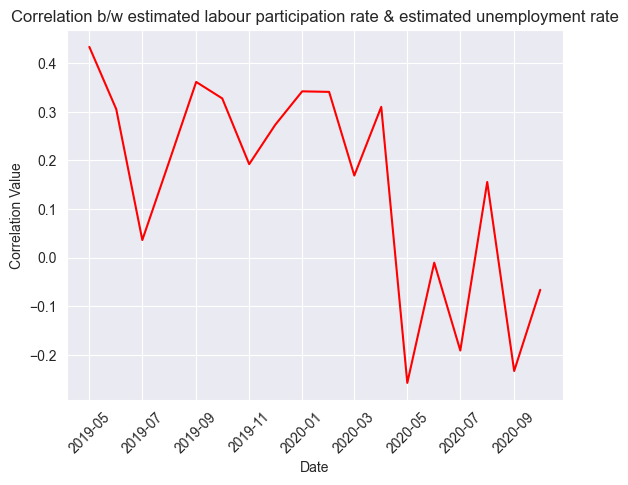

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(corr, color="red")
plt.xlabel("Date")
plt.ylabel("Correlation Value")
plt.title("Correlation b/w estimated labour participation rate & estimated unemployment rate")
plt.xticks(rotation=45)
plt.plot()

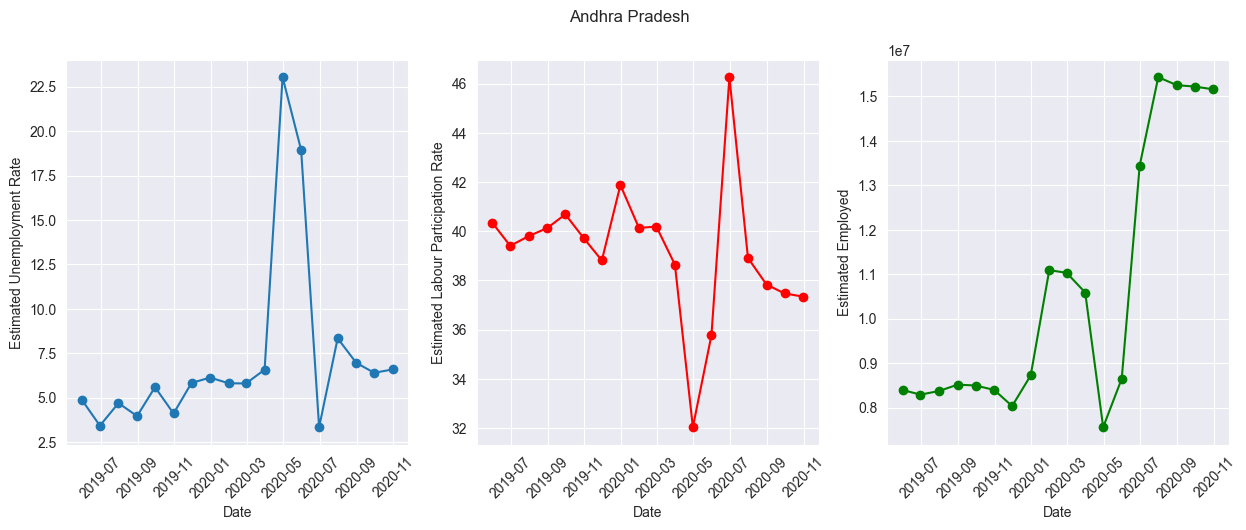

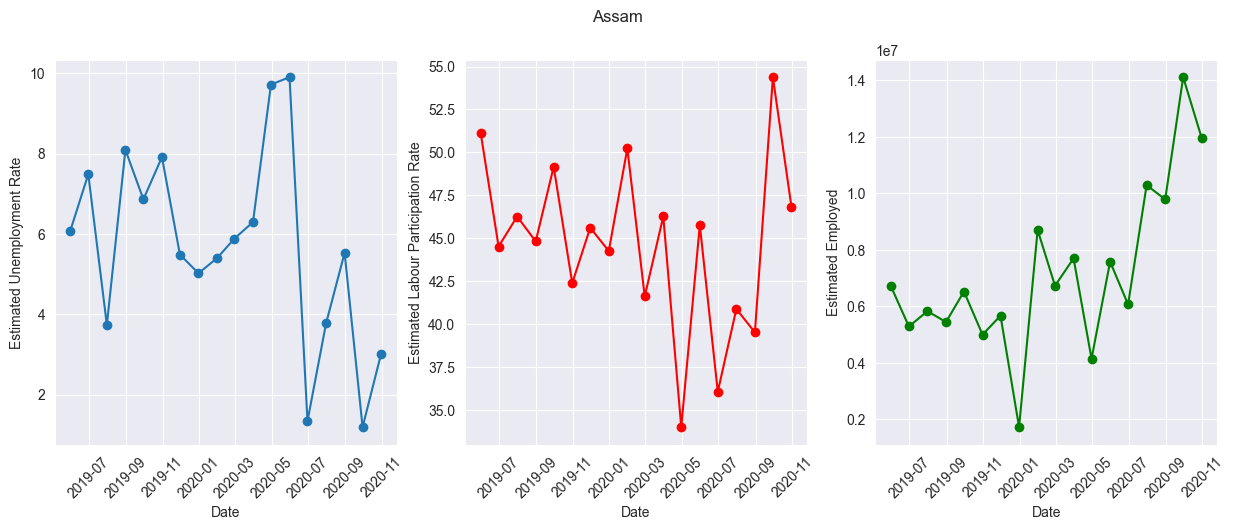

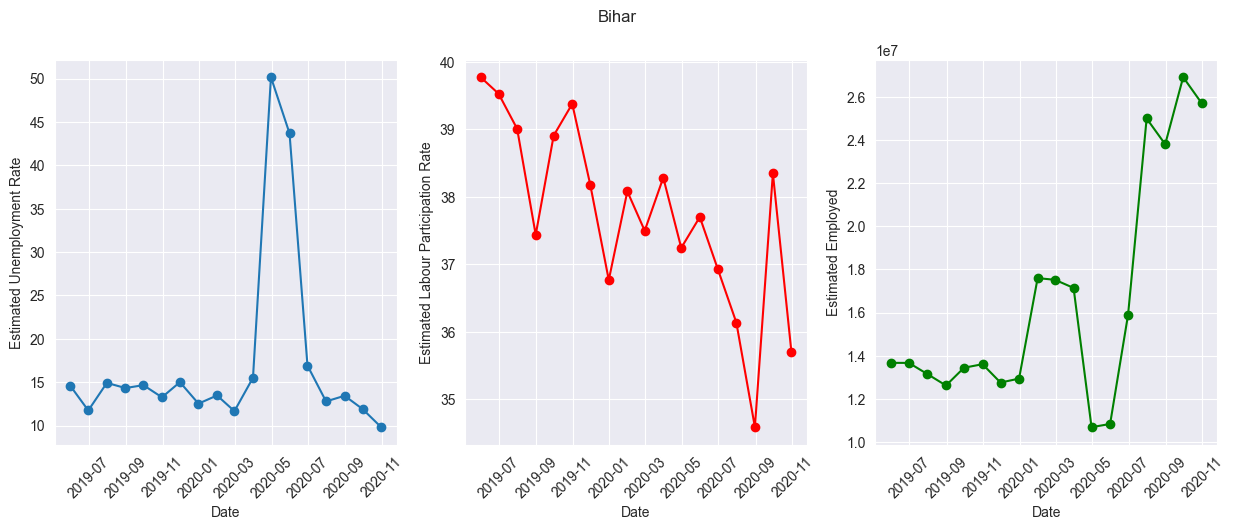

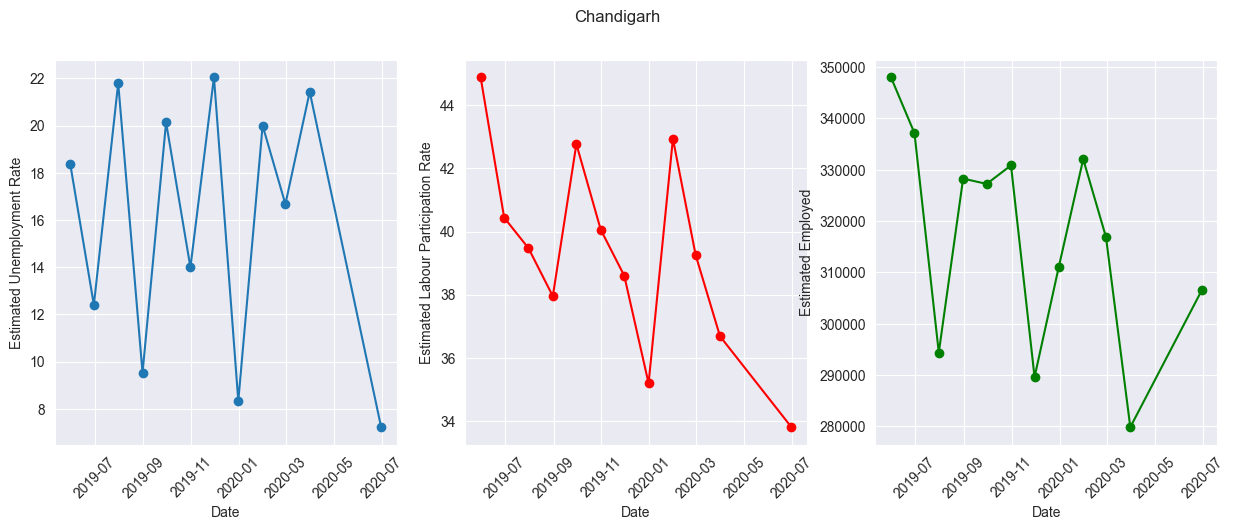

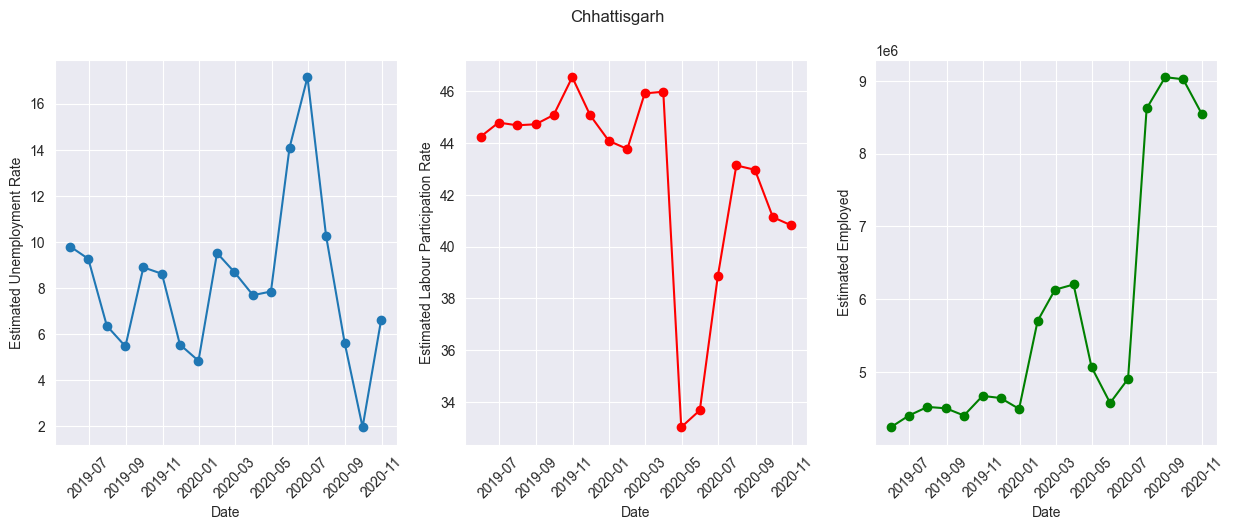

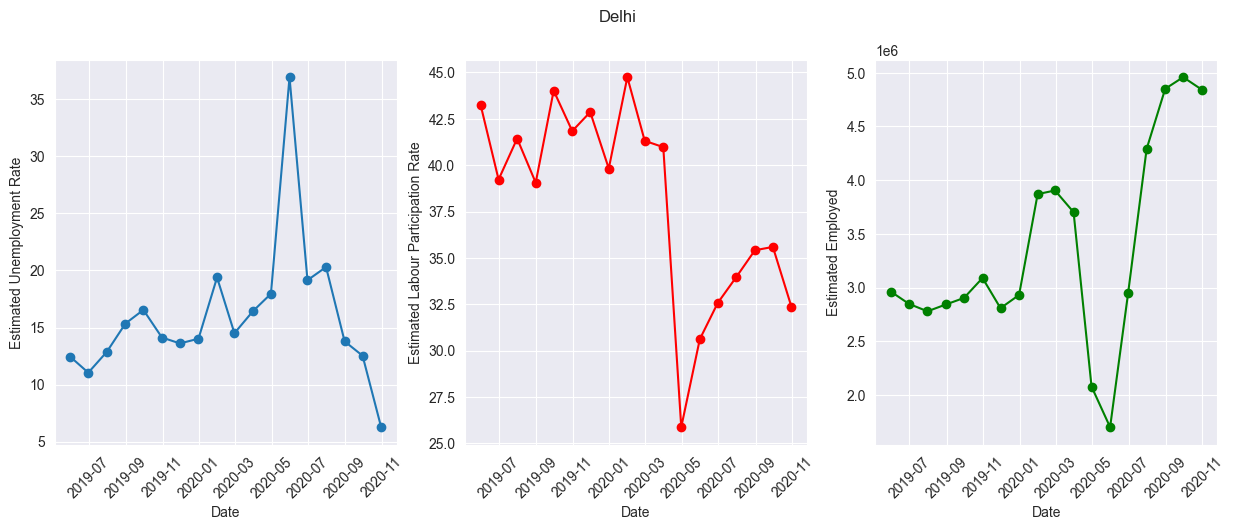

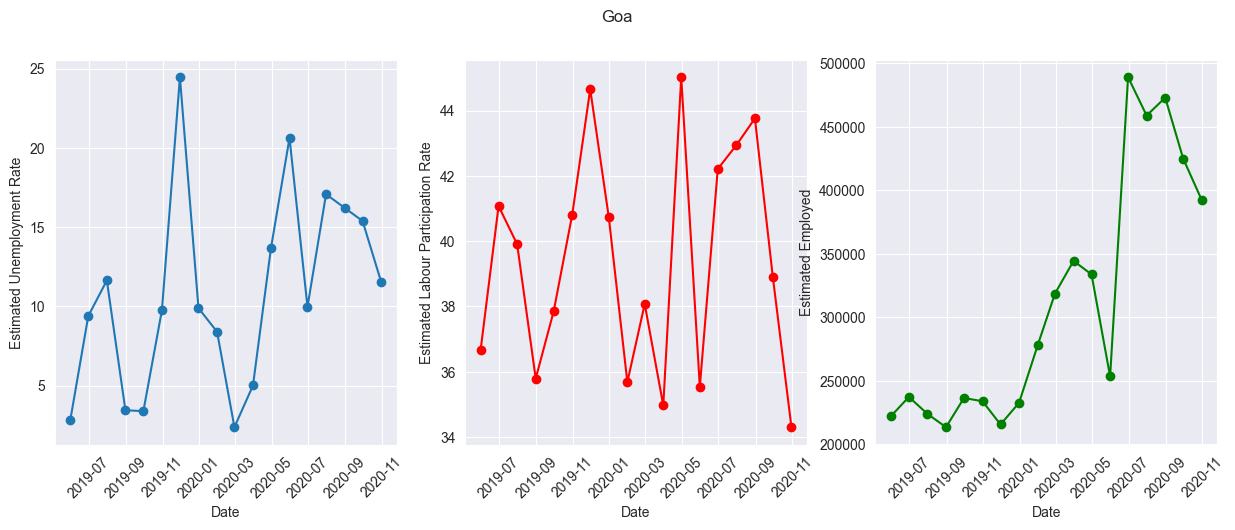

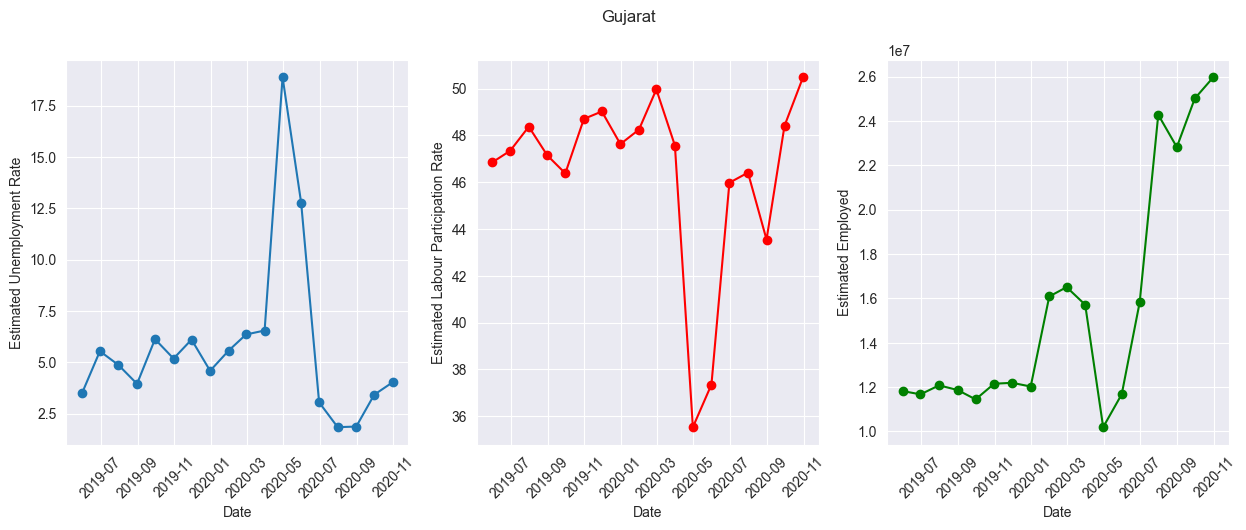

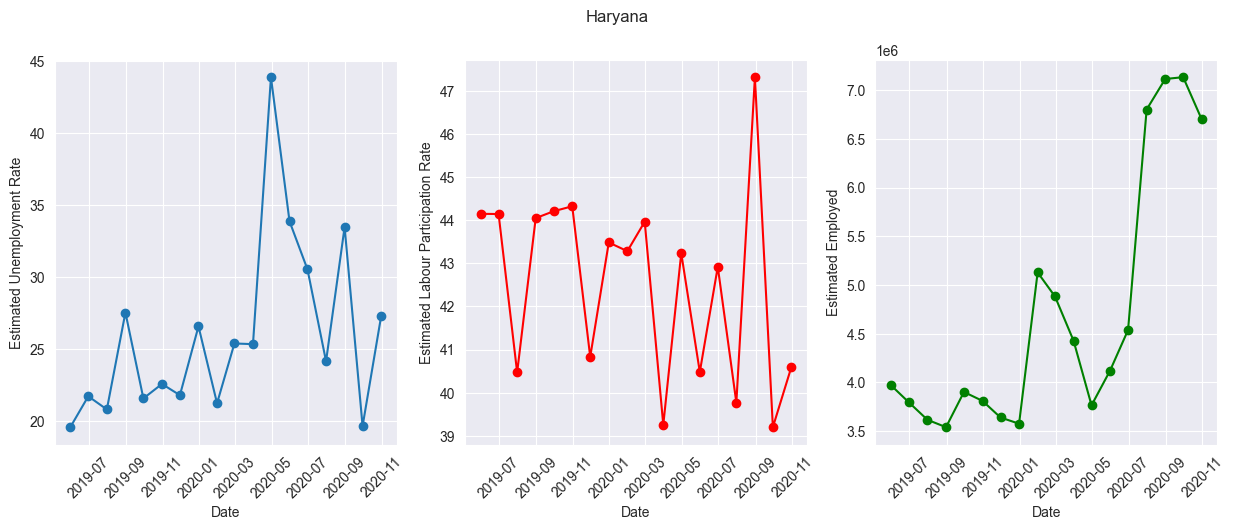

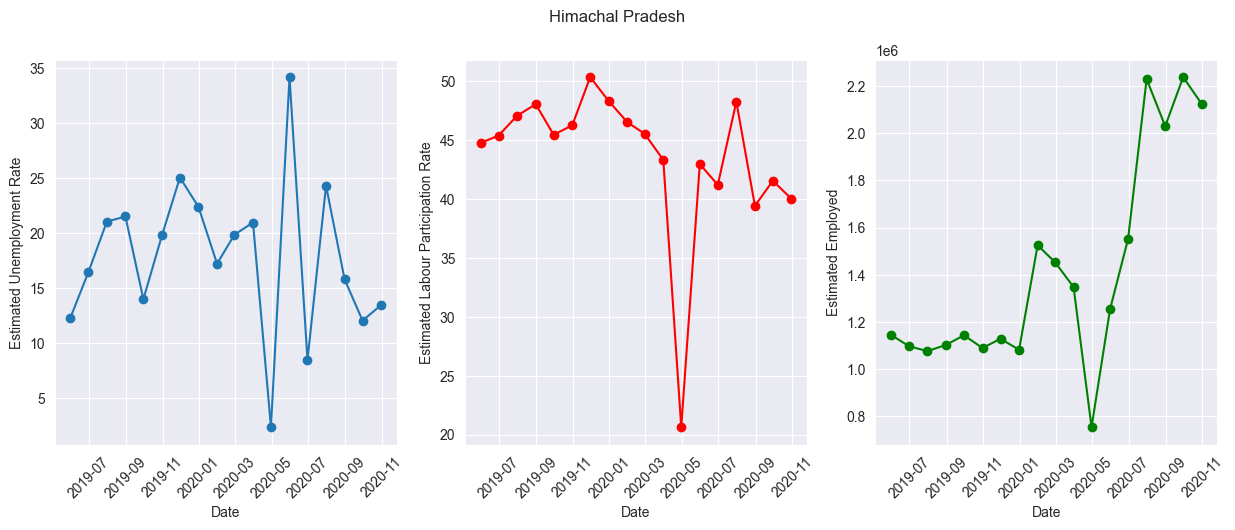

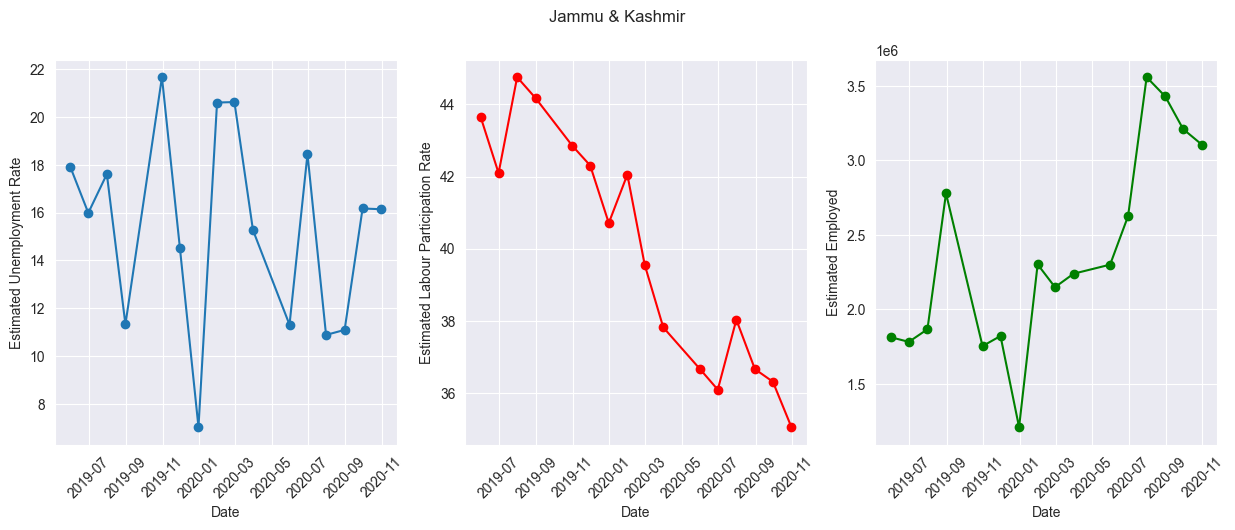

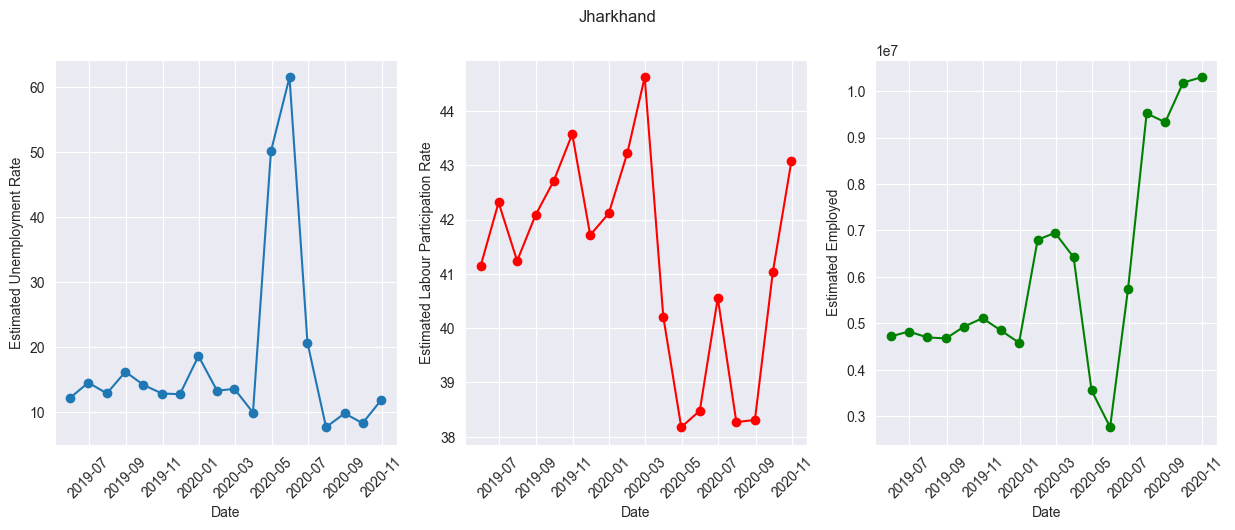

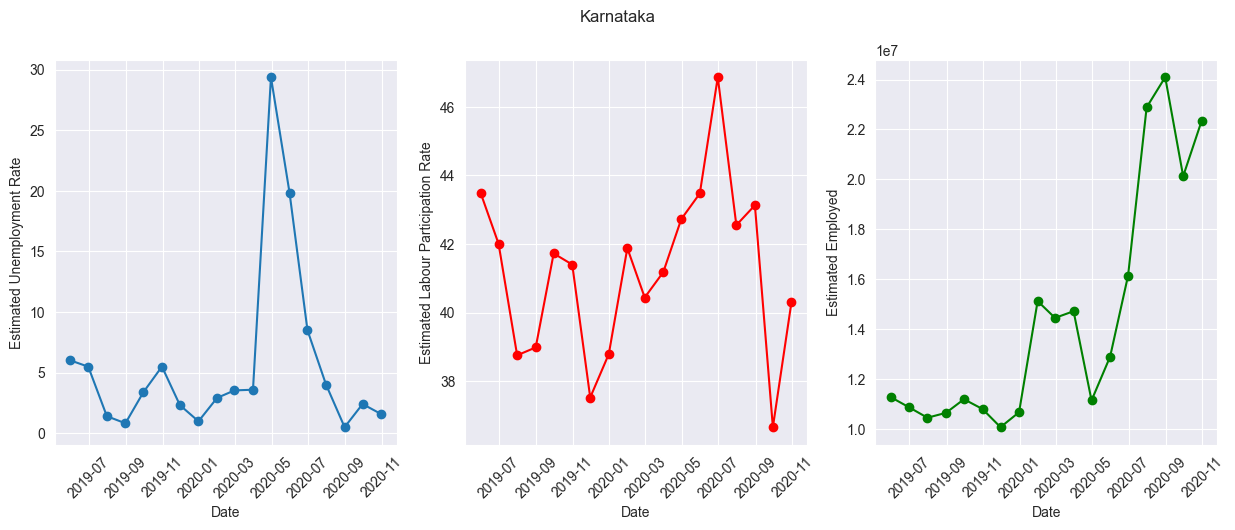

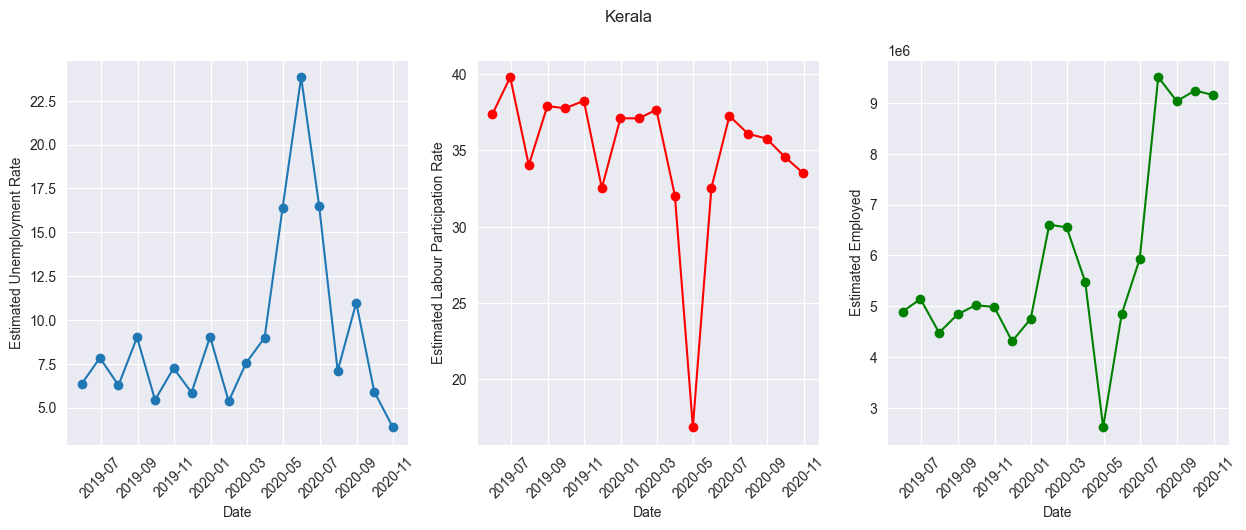

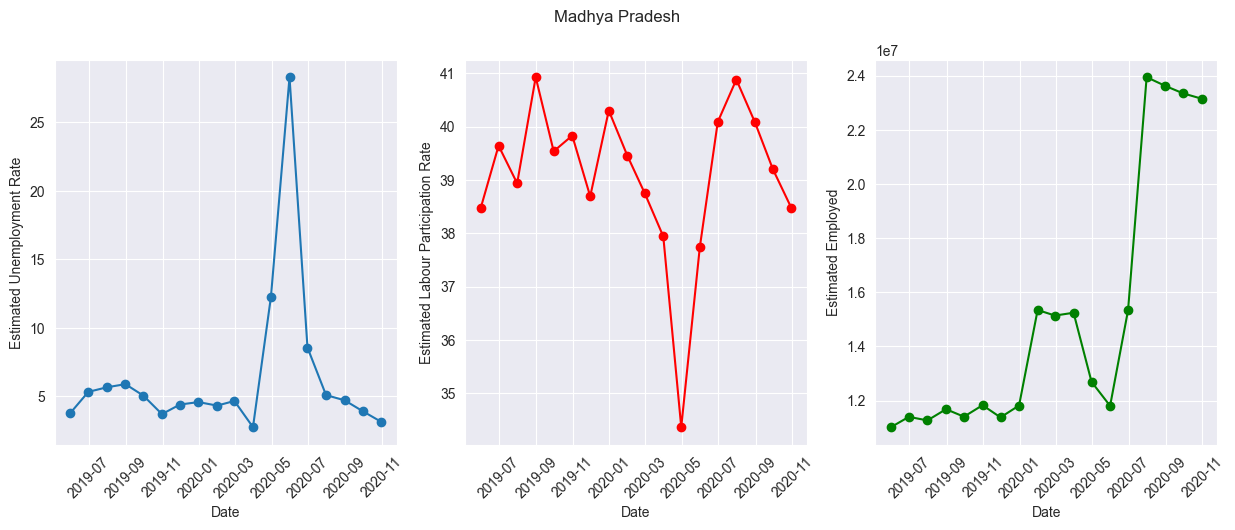

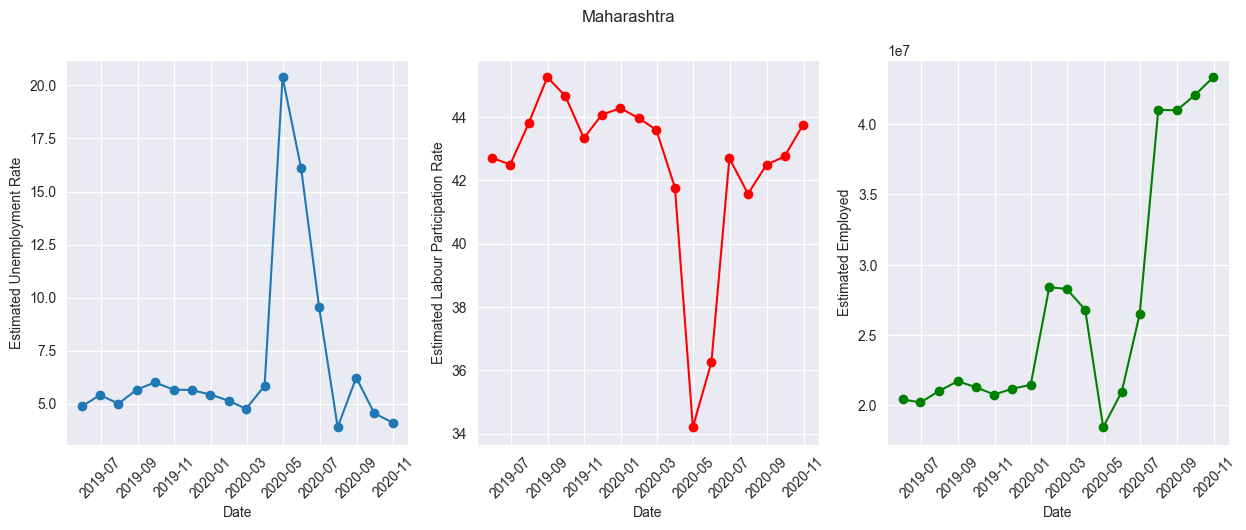

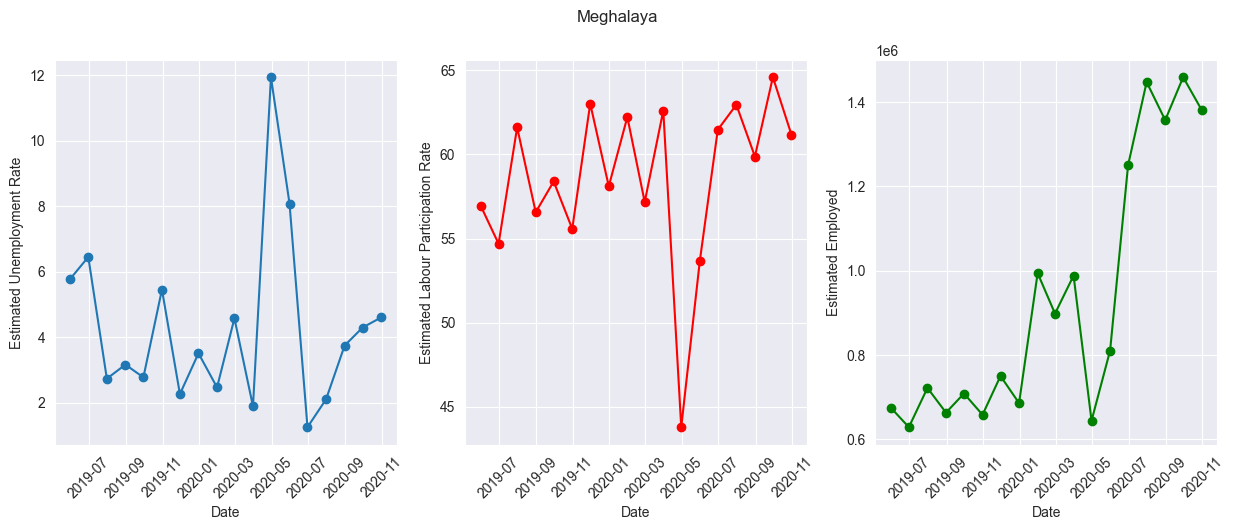

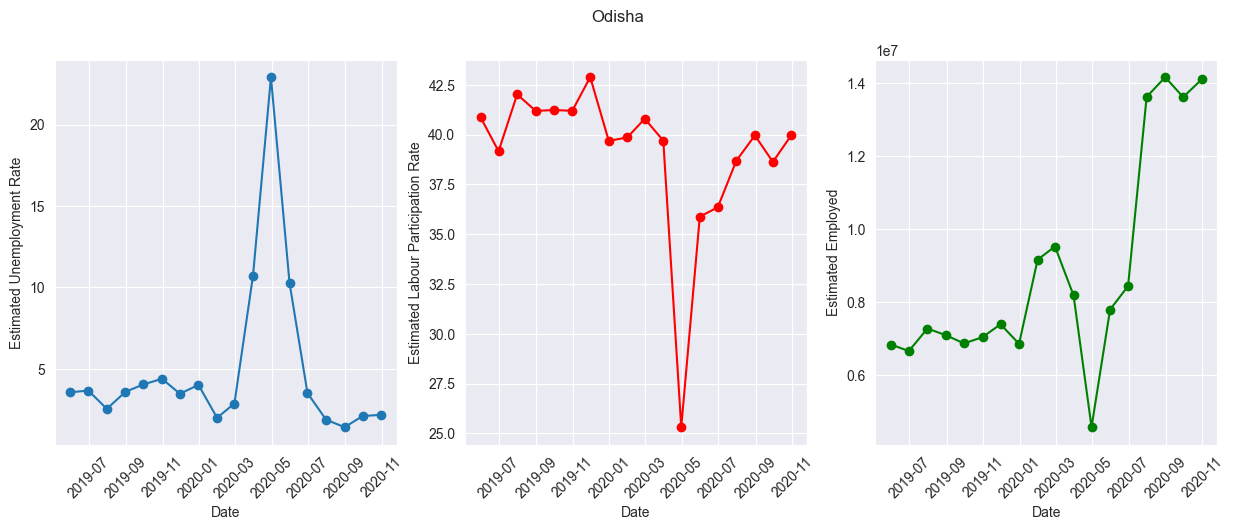

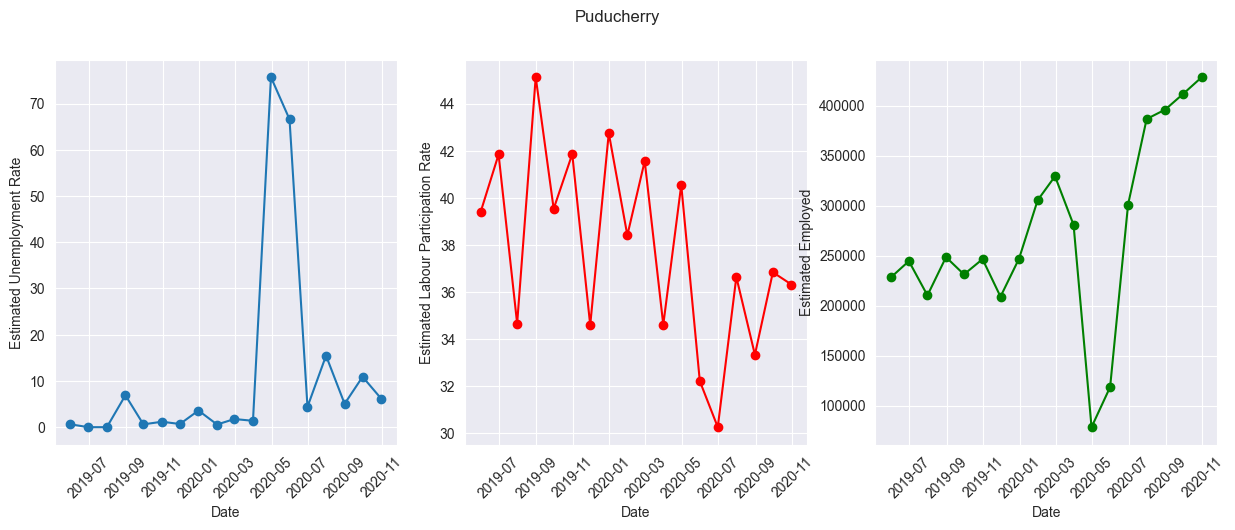

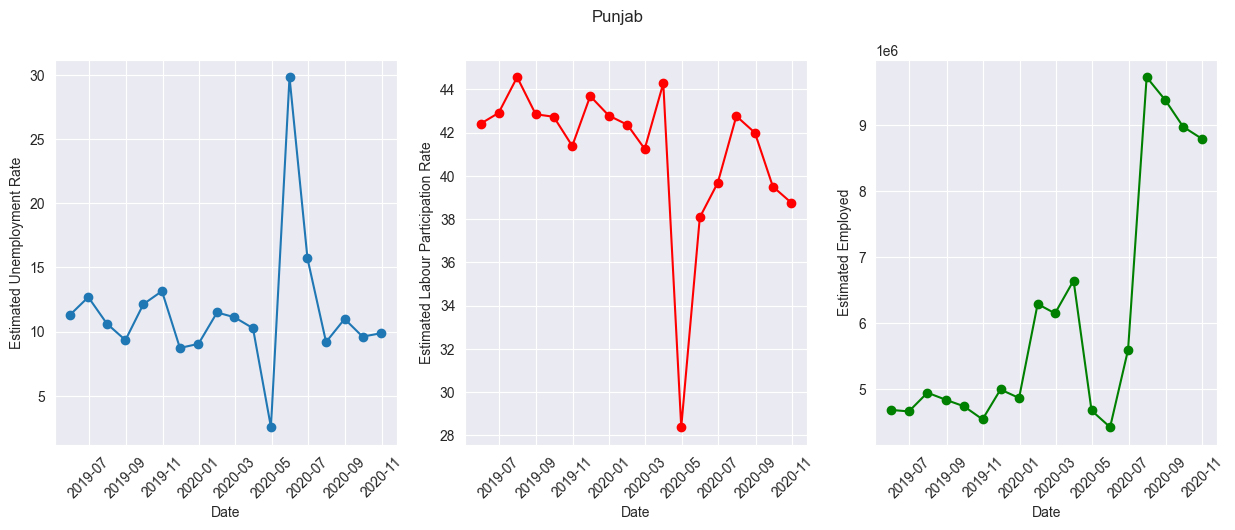

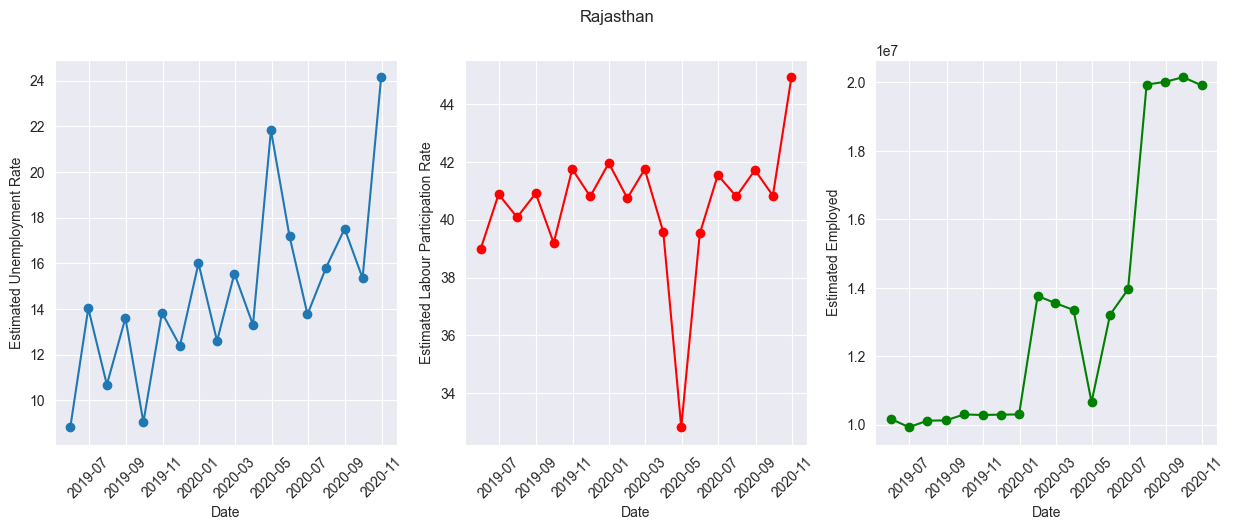

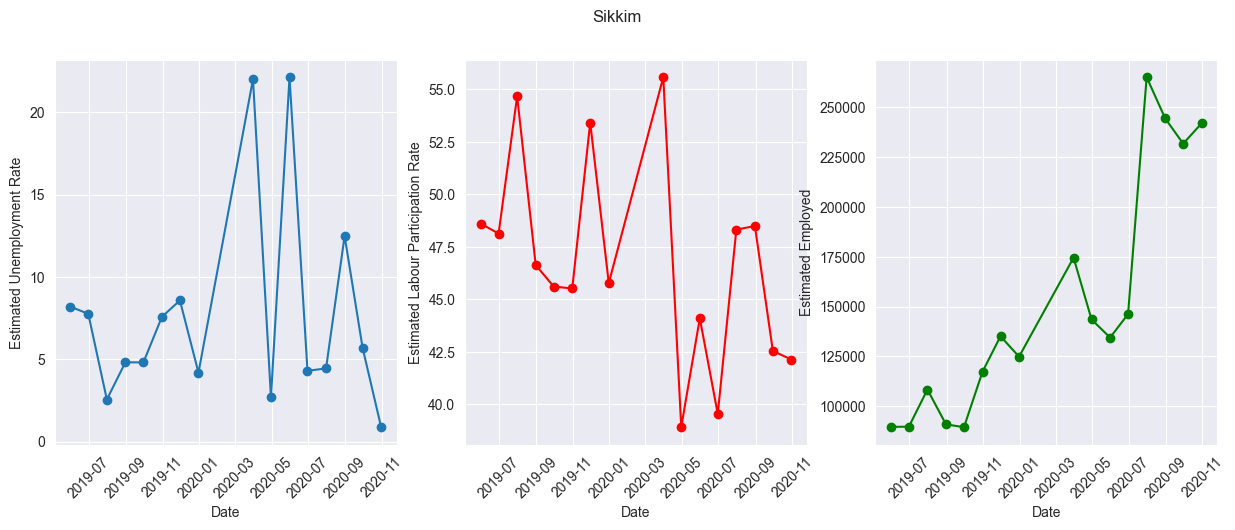

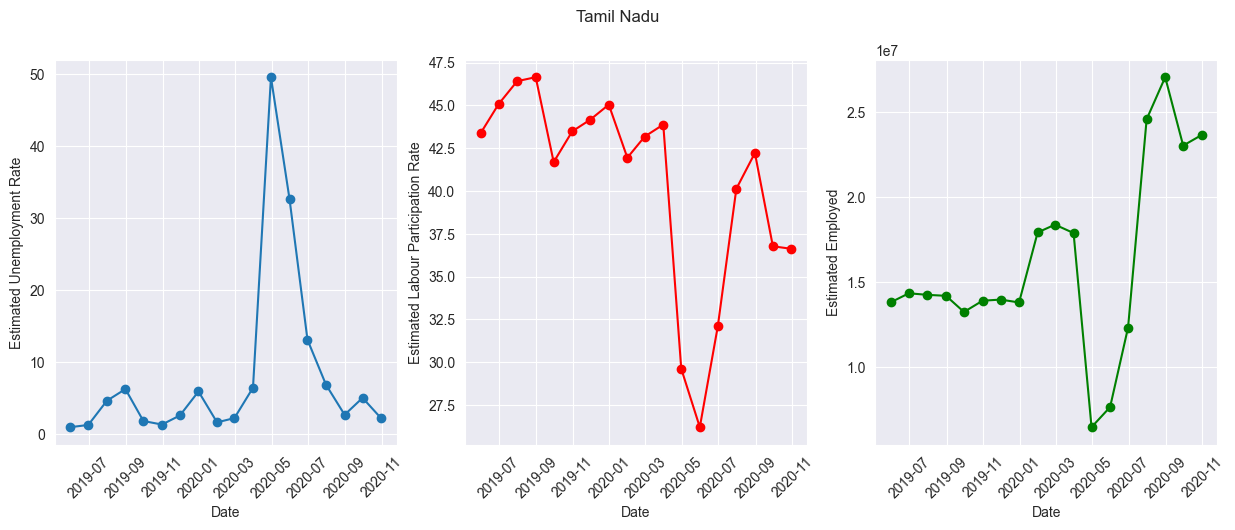

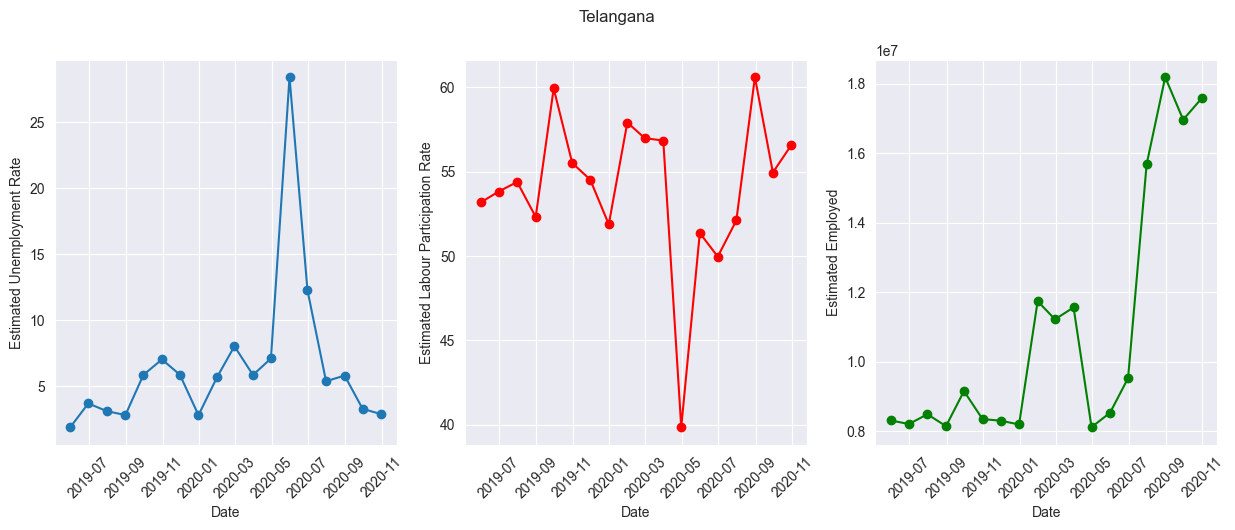

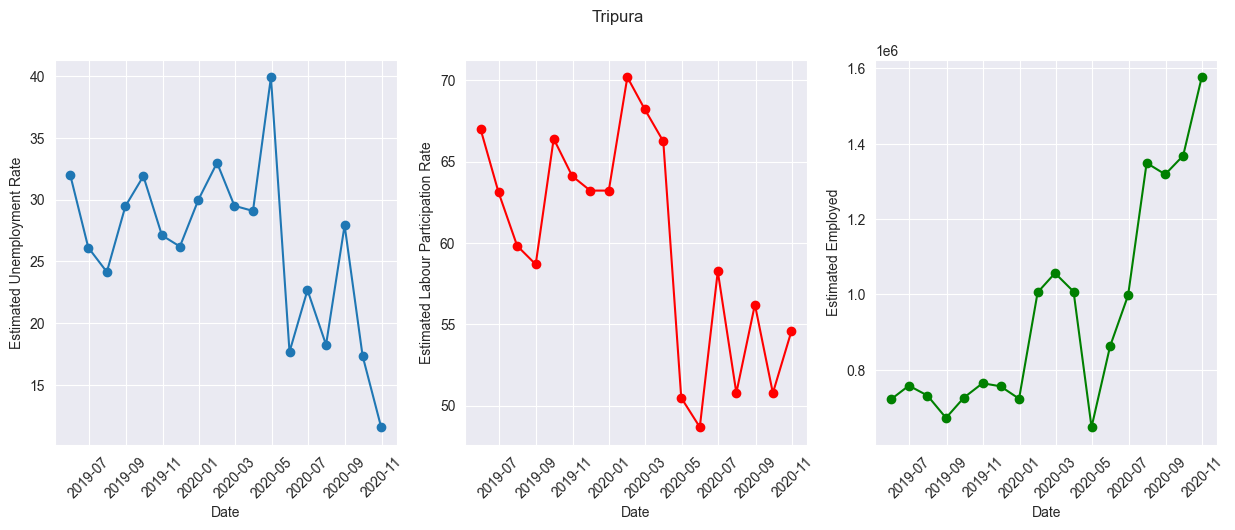

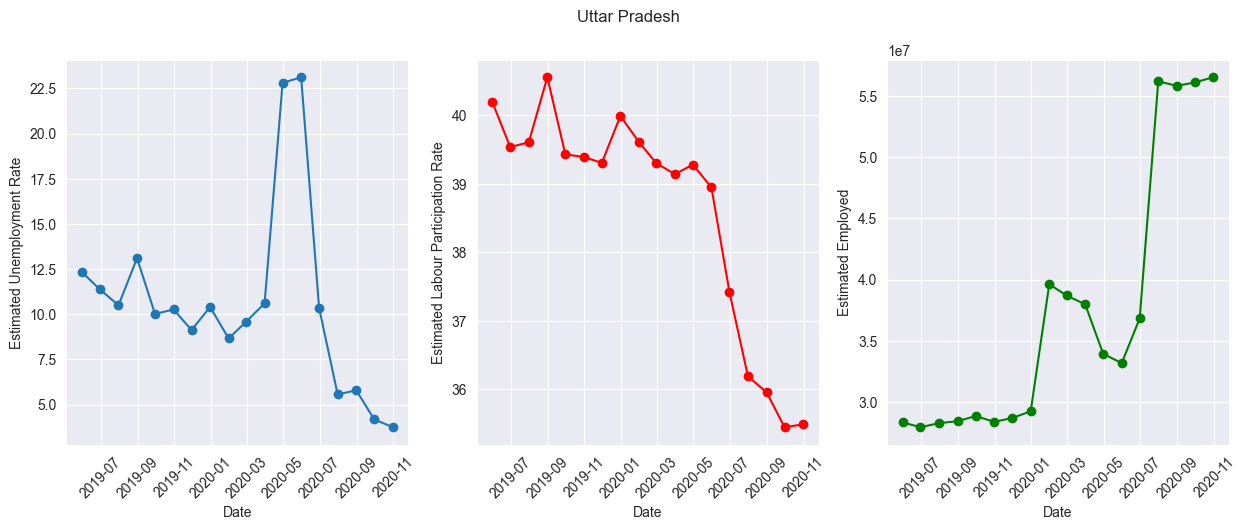

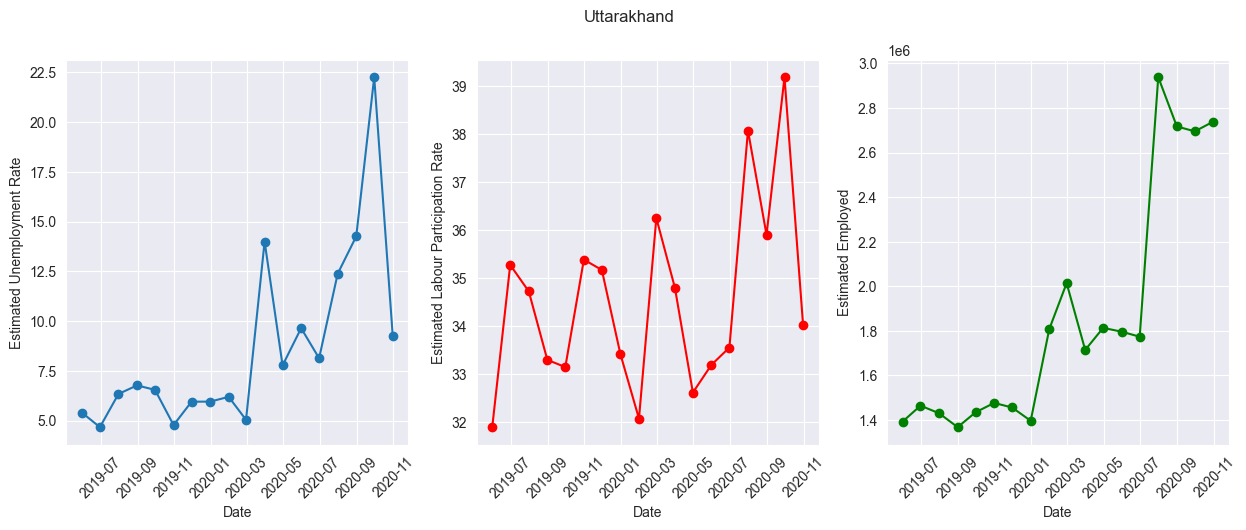

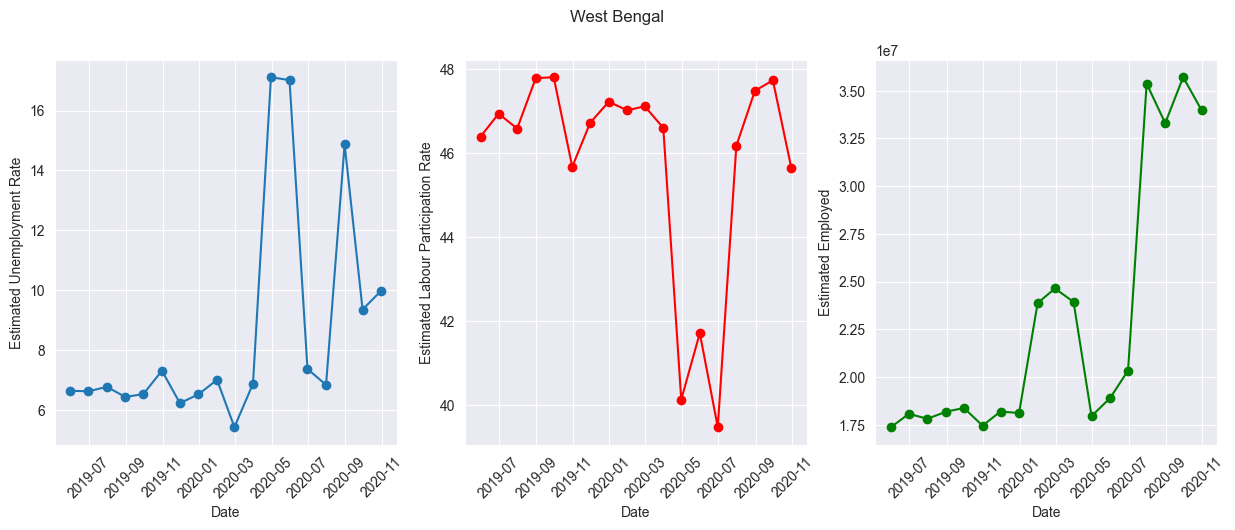

In [ ]:
for region in df["region"].unique():
    date = df[df["region"] == region]["date"]
    unemployment_rate = df[df["region"] == region]["estimated unemployment rate (%)"]
    labour_rate = df[df["region"] == region]["estimated labour participation rate (%)"]
    employed = df[df["region"] == region]["estimated employed"]

    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.plot(date, unemployment_rate, marker="o", linestyle="-")
    plt.xlabel("Date")
    plt.ylabel("Estimated Unemployment Rate")
    plt.xticks(rotation=45)

    plt.subplot(1,3,2)
    plt.plot(date, labour_rate, marker="o", linestyle="-", color="red")
    plt.xlabel("Date")
    plt.ylabel("Estimated Labour Participation Rate")
    fig.suptitle(region.title())
    plt.xticks(rotation=45)
    plt.plot()

    plt.subplot(1,3,3)
    plt.plot(date, employed, marker="o", linestyle="-", color="green")
    plt.xlabel("Date")
    plt.ylabel("Estimated Employed")
    fig.suptitle(region.title())
    plt.xticks(rotation=45)
    plt.plot()

# Thank you ❤